# 1. Vibration in a one-dimensional system

질량이 $m$인 $N$개의 동일한 물체가 일렬로 동일한 용수철에 매달려 있다. $i$번째 물체의 운동방정식은 다음처럼 주어진다.
$$m \frac{d^2 x_i}{dt^2} = k(x_{i+1}-x_{i}) - k(x_i-x_{i-1})$$
한쪽 끝에서 연결된 용수철에 주기적인 힘($F$)을 가하고 있다. 그러면 양 끝단에 물체에 운동방정식은 다음과 같다.
$$m \frac{d^2 x_1}{dt^2} = k(x_{2}-x_{1}) + F \\
m \frac{d^2 x_N}{dt^2} = -k(x_{N}-x_{N-1})$$
만약 주기적인 힘이 $F=C e^{i wt}$로 주어지면 $x$는 다음의 $x_i(t)=a_i e^{iwt}$해를 가진다. 정리하면 다음과 같은 방정식을 얻을 수 있다.
$$(d -k)a_1 -k a_2 = C, \\
d a_i - k a_{i-1}- k a_{i+1} = 0, \\
(d - k)a_N - k x_{N-1} =0$$
여기에서 $d=2k-mw^2$이다.

위의 운동방정식을 행렬로 표현하면 다음과 같다.
$$Ma=b $$$$
M=
\begin{pmatrix}
d-k &amp; -k &amp; 0 &amp; 0 &amp; 0 &amp; \cdots \\
-k &amp; d &amp; -k &amp; 0 &amp; 0 &amp; \cdots \\
0 &amp; -k &amp; d &amp; -k &amp; 0 &amp; \cdots \\
\cdots &amp;\cdots &amp;\cdots &amp;\cdots &amp;\cdots &amp; \cdots  \\
0 &amp; 0 &amp; 0&amp; 0&amp; -k &amp; d-k 
\end{pmatrix}, \quad
a=
\begin{pmatrix}
a_1 \\ 
a_2 \\ 
a_3 \\ 
\cdots \\ 
a_N  
\end{pmatrix}, \quad
b=
\begin{pmatrix}
C \\ 
0 \\ 
0 \\ 
\cdots \\ 
0 
\end{pmatrix}
$$

- $m=1$, $k=1$, $C=1$, $N=40$으로 고정하세요.
- $w$ (즉, d)를 바꾸어가면서 $a_i$를 구하세요.
- 이를 그래프로 표현하고 의미를 설명하세요. x축이 i (1~N), y축이 $a_i$
- 40X40 행렬을 직접 입력하는 것을 금지하지는 않지만 그렇게 하지 않기를 바랍니다.
- np.zeros(n) 함수는 크기가 n이며 모든 성분이 0인 배열을 만드는 명령어입니다.

In [31]:
def M(w,k):
  j=np.zeros((40,40))
  m=1
  d=2*k-m*(w**2)
  z=d-k
  for i in range(40):
    if i == 0:
      j[i][i]=z
      j[i][i+1]=-k
    elif i == 39:
      j[i][i]=z
      j[i][i-1]=-k
    else:
      j[i][i]=d
      j[i][i-1]=-k
      j[i][i+1]=-k
  return j

In [32]:
def b(c):
  k=np.zeros((40,1))
  k[0]=c
  return k

In [37]:
def draw():
    
    y=np.linalg.solve(M(1,1),b(1))
    y1=np.linalg.solve(M(2,1),b(1))
    y2=np.linalg.solve(M(3,1),b(1))

    x=[i for i in range(40)]
    plt.plot(x,y,label='w=1')
    plt.plot(x,y1,label='w=2')
    plt.plot(x,y2,label='w=3')
    plt.xlabel('i')
    plt.ylabel('ai', rotation=0)
    plt.legend()
    plt.show()

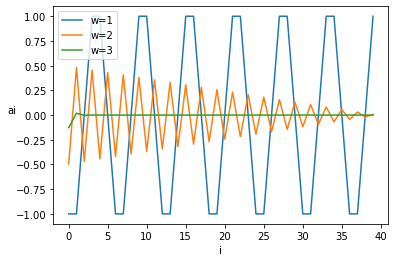

In [38]:
draw()

# 2. 양쪽 끝에서 힘을 가하면 어떻게 되는가?

즉, b행렬이 다음과 같은 경우에 대해서 살펴보아라.$$
b=
\begin{pmatrix}
C \\ 
0 \\ 
0 \\ 
\cdots \\ 
C 
\end{pmatrix}
$$

- $m=1$, $k=1$, $C=1$, $N=40$으로 고정하세요.
- $w$ (즉, d)를 바꾸어가면서 $a_i$를 구하세요.
- 이를 그래프로 표현하고 의미를 설명하세요.

In [39]:
def b1(c):
    k=np.zeros((40,1))
    k[0]=c
    k[39]=c
    return k

In [42]:
def draw1():
    y=np.linalg.solve(M(1,1),b1(1))
    y1=np.linalg.solve(M(2,1),b1(1))
    y2=np.linalg.solve(M(3,1),b1(1))

    x=[i for i in range(40)]
    plt.plot(x,y,label='w=1')
    plt.plot(x,y1,label='w=2')
    plt.plot(x,y2,label='w=3')
    plt.xlabel('i')
    plt.ylabel('ai', rotation=0)
    plt.legend()
    plt.show()

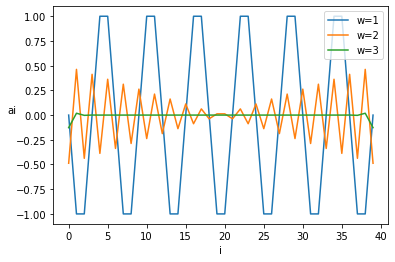

In [43]:
draw1()

d가 2,0 일떄 역행렬이 존재 하지 않았고 해를 구할 수 없었다. 양쪽 끝에서 힘을 주게 되면 즉 b의 끝항에 c가 추가되면 한 개일떄의 값보다 증가하는것을 볼 수 있다. d의 값이 커짐에 따라 그 차이가 더 커지는것을 확일 할 수 있다. 한쪽끝에서 힘을 줄때는 반대쪽 벽면의 힘이 0 이되고 양쪽에서 힘을 가하면 중간에서 힘이 0이됨을 알 수 있다.